# Pascal

In [1]:
import tensorflow as tf
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
tf.enable_eager_execution()

In [44]:
def draw_rectange(coord, img, color):
    p1 = (coord[0], coord[1])
    p2 = (coord[2] + p1[0], coord[3] + p1[1])
    return cv.rectangle(img, p1, p2, color, 4)

In [2]:
from flux.datasets.vision.pascal import PascalVOC, PascalVOC_Segmentation

[Flux] Initializing...


In [3]:
from flux.backend.globals import DATA_STORE

In [4]:
segmentation = PascalVOC_Segmentation(force_rebuild=False)

In [5]:
dataset = segmentation.train_db

In [6]:
iteration = tf.contrib.eager.Iterator(dataset.batch(1))

In [51]:
def get_classes(lst):
    return " ".join([segmentation._classes[i] for i in lst])

horse person pottedplant


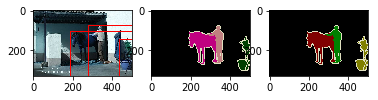

diningtable chair


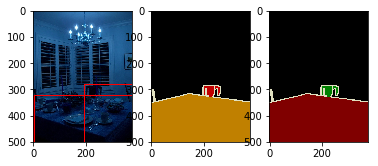

boat


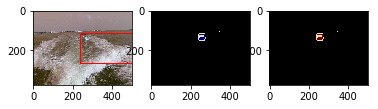

bus bus


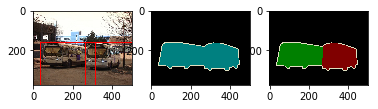

bottle bottle


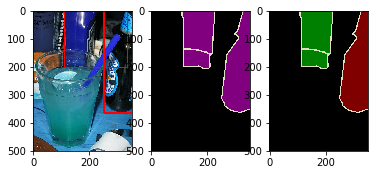

diningtable chair chair chair chair


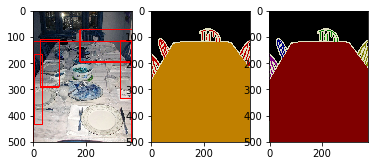

boat boat


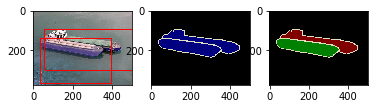

tvmonitor


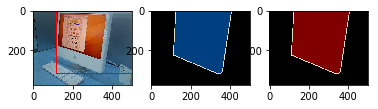

person person motorbike


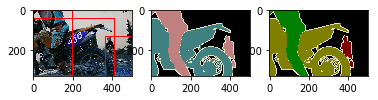

horse


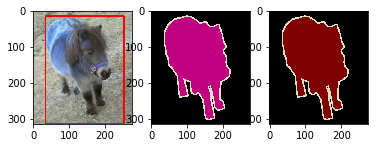

In [67]:
num_objs = set()
for _ in range(10):
    data = next(iteration)
    img, seg_class, seg_obj, boxes, gt_classes, gt_o, flipped, num = data
    img = img.numpy()[0]*255.0
    sample_image = sample_image[...,::-1]
    sample_class = seg_class.numpy()[0]
    sample_class = sample_class[...,::-1]
    sample_obj = seg_obj.numpy()[0]
    sample_obj = sample_obj[...,::-1]
    num_objs = num.numpy()[0][0]
    box = boxes.numpy()[0][:num_objs][:]
    gt_c = gt_classes.numpy()[0]
    print(get_classes([gt_c[i] for i in range(num_objs)]))
    overlap = gt_o.numpy()[0]
#     print(overlap)
    for b in box:
        img = draw_rectange(b, img.astype(np.uint8), (255, 0, 0))
    fig = plt.figure()
    ax1 = fig.add_subplot(1,3,1)
    ax1.imshow(img)
    ax2 = fig.add_subplot(1,3,2)
    ax2.imshow(sample_class)
    ax3 = fig.add_subplot(1,3,3)
    ax3.imshow(sample_obj)
    plt.show()
